# Explore IMDb movies dataset

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize
from project_utils import *

%reload_ext lab_black
%load_ext autoreload
%autoreload 2

## Import data

In [2]:
movies_df = pd.read_csv("./data/tmdb_5000_movies.csv", sep=",", quotechar='"').rename(
    {"id": "movie_id"}, axis=1
)
movies_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
credits_df = pd.read_csv("./data/tmdb_5000_credits.csv", sep=",", quotechar='"')

In [5]:
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

## Explore movies data

In [6]:
movies_df.describe()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Numerical features exploration
Plot the histograms of the numerical features to indentify outliers

In [7]:
np.log10(np.min(movies_df["budget"]) + 1e-6)

-6.0

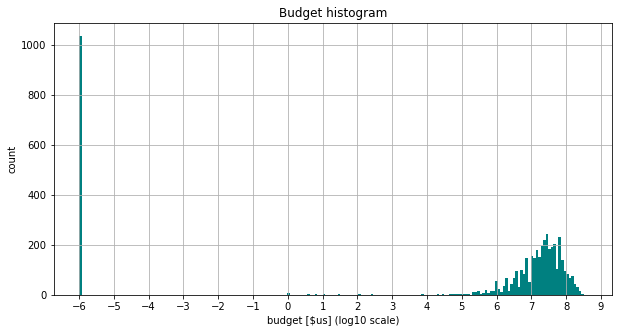

In [8]:
col = movies_df["budget"]
plot_hist(col, "Budget histogram", "budget [$us] (log10 scale)", "count", log=True)

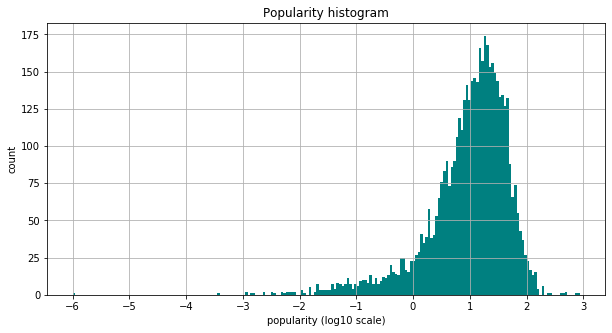

In [9]:
col = movies_df["popularity"]
plot_hist(col, "Popularity histogram", "popularity (log10 scale)", "count", log=True)

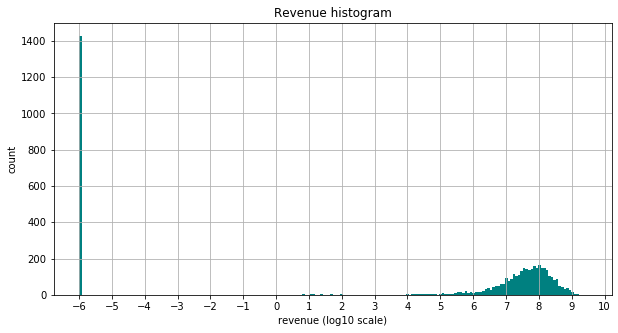

In [10]:
col = movies_df["revenue"]
plot_hist(col, "Revenue histogram", "revenue (log10 scale)", "count", log=True)

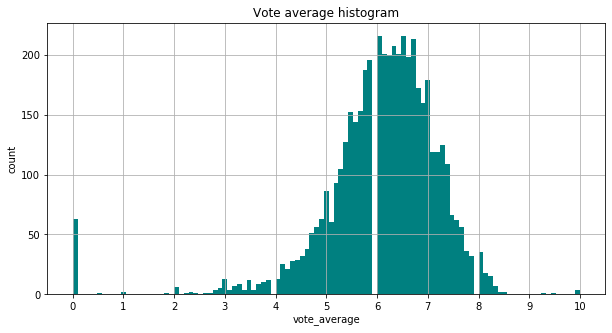

In [11]:
col = movies_df["vote_average"]
plot_hist(col, "Vote average histogram", "vote_average", "count", log=False, bins=105)

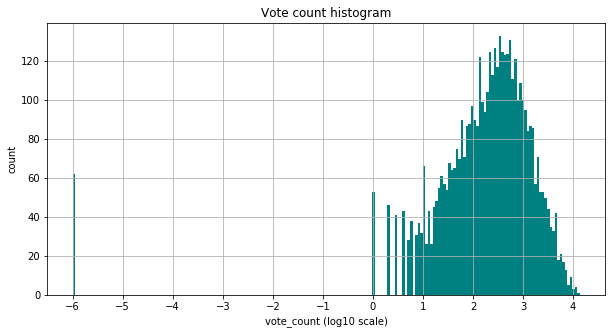

In [12]:
col = movies_df["vote_count"]
plot_hist(col, "Vote count histogram", "vote_count (log10 scale)", "count", log=True)

### Number of movies to remove

In [13]:
cond_to_remove = (
    (movies_df["budget"] == 0)
    | (movies_df["popularity"] == 0)
    | (movies_df["revenue"] == 0)
    | (movies_df["runtime"] == 0)
    | (movies_df["vote_average"] == 0)
    | (movies_df["vote_count"] == 0)
)
to_remove_movies_df = movies_df[cond_to_remove][
    [
        "title",
        "genres",
        "production_companies",
        "budget",
        "popularity",
        "revenue",
        "runtime",
        "vote_average",
        "vote_count",
    ]
]
print(("Number of movies to remove: " + str(len(to_remove_movies_df))))
to_remove_movies_df.head()

Number of movies to remove: 1576


,title,genres,production_companies,budget,popularity,revenue,runtime,vote_average,vote_count
83,The Lovers,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...",27000000,2.418535,0,109.0,4.8,34
135,The Wolfman,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...","[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",150000000,21.214571,0,102.0,5.5,549
265,The Cat in the Hat,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...","[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",0,18.251129,0,82.0,4.9,366
309,Son of the Mask,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...","[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",84000000,17.815595,0,94.0,3.6,338
321,The Campaign,"[{""id"": 35, ""name"": ""Comedy""}]","[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...",0,16.460356,104907746,85.0,5.6,578


### Categorical features exploration

In [14]:
values, _ = get_json_values_from_col(movies_df["genres"], "name")
values

['War',
 'Romance',
 'Family',
 'Science Fiction',
 'Fantasy',
 'Crime',
 'Action',
 'Adventure',
 'Western',
 'History',
 'Foreign',
 'Animation',
 'Documentary',
 'Drama',
 'Thriller',
 'TV Movie',
 'Comedy',
 'Mystery',
 'Music',
 'Horror']

In [15]:
values, _ = get_json_values_from_col(movies_df["production_companies"], "name")
values[:20]

['Loma Nasha',
 'Anthem Pictures',
 'Wellington Films',
 'C.R.G. International',
 'Tiger Moth Productions',
 'Cheri Productions',
 'Prospect Pictures',
 'Little Brother Inc.',
 'Marc Platt Productions',
 'Redbus Pictures',
 'Fierce Entertainment',
 'Egoli Tossell Film',
 'North Box Productions',
 'Shade Pictures',
 'Rex Media',
 'Younggu-Art Movies',
 'Touchy Feely Films',
 'Sunrise Productions',
 'Emotion Pictures',
 'Furry Vengeance Productions']

In [16]:
values, _ = get_json_values_from_col(movies_df["keywords"], "name")
values[:20]

['home invasion',
 'sinking ship',
 'teenage pregnancy',
 'military',
 'child as an adult',
 'interracial marriage',
 'budget cutting',
 'book store',
 'hook',
 'videoconferencing',
 'folk horror',
 'intrigue',
 'child uses gun',
 'pripyat',
 'animal lead',
 'burglar',
 'body armor',
 'ship captain',
 'swinger',
 'husband']

### Time features exploration

In [17]:
movies_df["release_date"] = movies_df["release_date"].astype("datetime64")

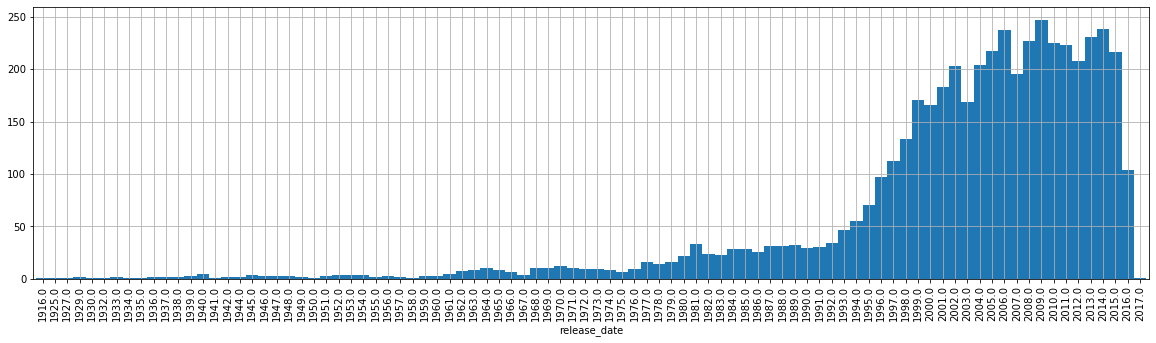

In [18]:
fig, ax = plt.subplots(figsize=(20, 5))
years = movies_df["release_date"].dt.year
years = years[years.notna()]
tick_labels = years.unique().astype(int)
movies_df["release_date"].groupby([movies_df["release_date"].dt.year]).count().plot(
    ax=ax, kind="bar", grid=True, width=1, tick_label=tick_labels,
)

## Explore credits data

In [19]:
list(credits_df.columns)

['movie_id', 'title', 'cast', 'crew']

### Explore json fields

#### Explore json keys

In [20]:
col = credits_df["cast"]
values, _ = get_json_keys_from_col(col)
values[:20]

['gender', 'cast_id', 'character', 'id', 'credit_id', 'name', 'order']

In [21]:
col = credits_df["crew"]
values, _ = get_json_keys_from_col(col)
values[:20]

['gender', 'id', 'credit_id', 'department', 'name', 'job']

In [22]:
values, _ = get_json_values_from_col(credits_df["crew"], "job")
values[:20]

['First Assistant Sound Editor',
 'Sound Effects Designer',
 'Development Manager',
 'Visual Development',
 'Simulation & Effects Artist',
 'Co-Costume Designer',
 'Sound Recordist',
 '3D Supervisor',
 'Directing Lighting Artist',
 'Digital Intermediate',
 'Supervising ADR Editor',
 'Conceptual Design',
 'Hair Department Head',
 'Techno Crane Operator',
 'Animatronics Designer',
 'Assistant Costume Designer',
 'Tailor',
 'Dialogue Editor',
 'Armorer',
 'Finance']

#### Most relevant jobs of the crew
Manually selected from the whole list of jobs
- Director
- Co-Director
- Creator
- Producer
- Editor
- Executive Producer
- Co-Executive Producer
- Co-Producer
- Script Editor
- Executive In Charge Of Production
- Author
- Dialogue Editor
- Script
- Original Story

In [23]:
values, _ = get_json_values_from_col(credits_df["crew"], "gender")
values

[0, 1, 2]